In [1]:
# import modules
%pylab inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, InputLayer
from keras.regularizers import L1L2

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# to stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [3]:
# set path
data_dir = os.path.abspath('../Data')

In [4]:
# load data
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
train_x = train.iloc[:,1:].values.astype('float32')/255

In [5]:
train_x = train_x.reshape(42000,28,28)

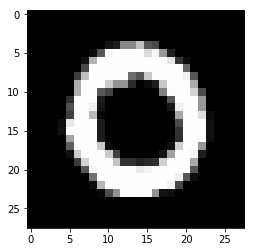

In [6]:
pylab.imshow(train_x[1],cmap="gray")
pylab.show()

In [7]:
# define vars
g_input_shape = 100
d_input_shape = (28, 28)
hidden_1_num_units = 500
hidden_2_num_units = 500
g_output_num_units = 784
d_output_num_units = 1
epochs = 100
batch_size = 128

In [8]:
# generator
model_1 = Sequential([
    Dense(units=hidden_1_num_units, input_dim=g_input_shape, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),

    Dense(units=hidden_2_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),
        
    Dense(units=g_output_num_units, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5)),
    
    Reshape(d_input_shape),
])

# discriminator
model_2 = Sequential([
    InputLayer(input_shape=d_input_shape),
    
    Flatten(),
        
    Dense(units=hidden_1_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),

    Dense(units=hidden_2_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),
        
    Dense(units=d_output_num_units, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5)),
])

In [9]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 784)               392784    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 693,784
Trainable params: 693,784
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 501       
Total params: 643,501
Trainable params: 643,501
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import AdversarialOptimizerSimultaneous, normal_latent_sampling

In [12]:
gan = simple_gan(model_1, model_2, normal_latent_sampling((100,)))
model = AdversarialModel(base_model=gan,player_params=[model_1.trainable_weights, model_2.trainable_weights])
model.adversarial_compile(adversarial_optimizer=AdversarialOptimizerSimultaneous(), player_optimizers=['adam', 'adam'], loss='binary_crossentropy')

history = model.fit(x=train_x, y=gan_targets(train_x.shape[0]), epochs=epochs, batch_size=batch_size)

Epoch 1/100
42000/42000 [==============================] - 24s 571us/step - loss: 24.9957 - player_0_loss: 22.6512 - player_0_yfake_loss: 10.5243 - player_0_yreal_loss: 9.8038 - player_1_loss: 2.3445 - player_1_yfake_loss: 0.0104 - player_1_yreal_loss: 0.0111
Epoch 2/100
42000/42000 [==============================] - 15s 361us/step - loss: 23.7769 - player_0_loss: 22.5337 - player_0_yfake_loss: 11.5090 - player_0_yreal_loss: 9.7830 - player_1_loss: 1.2432 - player_1_yfake_loss: 1.7123e-04 - player_1_yreal_loss: 0.0013
Epoch 3/100
42000/42000 [==============================] - 15s 359us/step - loss: 24.8918 - player_0_loss: 23.9347 - player_0_yfake_loss: 11.6417 - player_0_yreal_loss: 11.3803 - player_1_loss: 0.9571 - player_1_yfake_loss: 0.0182 - player_1_yreal_loss: 0.0262
Epoch 4/100
42000/42000 [==============================] - 15s 360us/step - loss: 28.6453 - player_0_loss: 27.9362 - player_0_yfake_loss: 15.3394 - player_0_yreal_loss: 11.9014 - player_1_loss: 0.7091 - player_1_yfa

42000/42000 [==============================] - 15s 358us/step - loss: 22.7256 - player_0_loss: 22.1104 - player_0_yfake_loss: 6.6093 - player_0_yreal_loss: 14.9009 - player_1_loss: 0.6152 - player_1_yfake_loss: 0.0051 - player_1_yreal_loss: 0.0098
Epoch 31/100
42000/42000 [==============================] - 15s 358us/step - loss: 22.2577 - player_0_loss: 21.6594 - player_0_yfake_loss: 6.5521 - player_0_yreal_loss: 14.5243 - player_1_loss: 0.5982 - player_1_yfake_loss: 0.0047 - player_1_yreal_loss: 0.0105
Epoch 32/100
42000/42000 [==============================] - 15s 359us/step - loss: 22.3121 - player_0_loss: 21.7299 - player_0_yfake_loss: 6.4550 - player_0_yreal_loss: 14.7005 - player_1_loss: 0.5821 - player_1_yfake_loss: 0.0031 - player_1_yreal_loss: 0.0046
Epoch 33/100
42000/42000 [==============================] - 15s 359us/step - loss: 22.0874 - player_0_loss: 21.5171 - player_0_yfake_loss: 6.5694 - player_0_yreal_loss: 14.3887 - player_1_loss: 0.5703 - player_1_yfake_loss: 0.0041

42000/42000 [==============================] - 16s 370us/step - loss: 22.4254 - player_0_loss: 21.8660 - player_0_yfake_loss: 6.7460 - player_0_yreal_loss: 14.5741 - player_1_loss: 0.5594 - player_1_yfake_loss: 0.0046 - player_1_yreal_loss: 0.0089
Epoch 62/100
42000/42000 [==============================] - 16s 369us/step - loss: 22.1475 - player_0_loss: 21.5931 - player_0_yfake_loss: 6.7136 - player_0_yreal_loss: 14.3385 - player_1_loss: 0.5543 - player_1_yfake_loss: 0.0044 - player_1_yreal_loss: 0.0088
Epoch 63/100
42000/42000 [==============================] - 15s 360us/step - loss: 22.4306 - player_0_loss: 21.8724 - player_0_yfake_loss: 6.7248 - player_0_yreal_loss: 14.6050 - player_1_loss: 0.5582 - player_1_yfake_loss: 0.0053 - player_1_yreal_loss: 0.0103
Epoch 64/100
42000/42000 [==============================] - 15s 369us/step - loss: 23.2772 - player_0_loss: 22.7124 - player_0_yfake_loss: 7.4463 - player_0_yreal_loss: 14.7173 - player_1_loss: 0.5648 - player_1_yfake_loss: 0.0053

42000/42000 [==============================] - 15s 364us/step - loss: 22.7738 - player_0_loss: 22.1773 - player_0_yfake_loss: 7.2669 - player_0_yreal_loss: 14.3215 - player_1_loss: 0.5964 - player_1_yfake_loss: 0.0027 - player_1_yreal_loss: 0.0048
Epoch 92/100
42000/42000 [==============================] - 16s 375us/step - loss: 21.9374 - player_0_loss: 21.3262 - player_0_yfake_loss: 6.9538 - player_0_yreal_loss: 13.7732 - player_1_loss: 0.6112 - player_1_yfake_loss: 0.0046 - player_1_yreal_loss: 0.0074
Epoch 93/100
42000/42000 [==============================] - 15s 361us/step - loss: 22.7329 - player_0_loss: 22.1295 - player_0_yfake_loss: 7.0901 - player_0_yreal_loss: 14.4437 - player_1_loss: 0.6034 - player_1_yfake_loss: 0.0029 - player_1_yreal_loss: 0.0049
Epoch 94/100
42000/42000 [==============================] - 15s 363us/step - loss: 22.8756 - player_0_loss: 22.2784 - player_0_yfake_loss: 7.2430 - player_0_yreal_loss: 14.4450 - player_1_loss: 0.5972 - player_1_yfake_loss: 0.0027

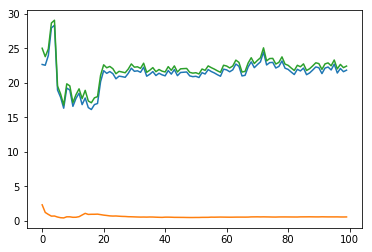

In [13]:
plt.plot(history.history['player_0_loss'])
plt.plot(history.history['player_1_loss'])
plt.plot(history.history['loss'])

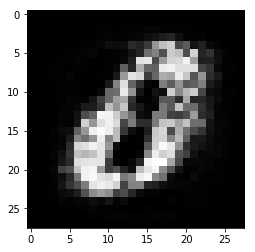

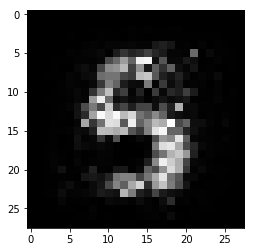

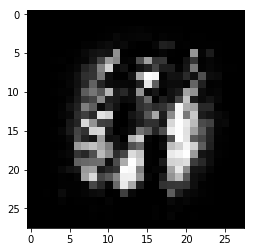

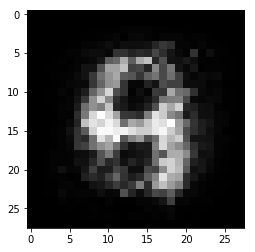

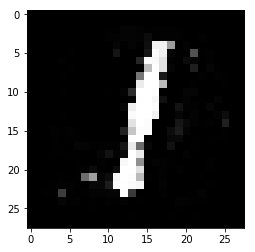

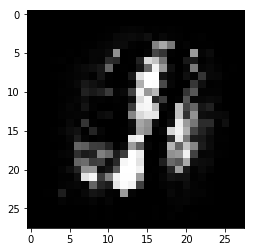

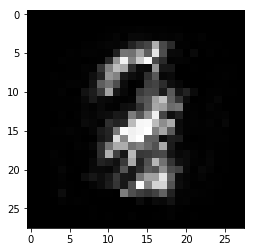

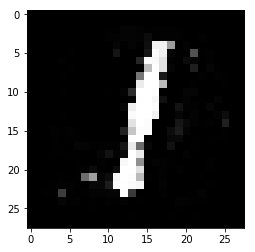

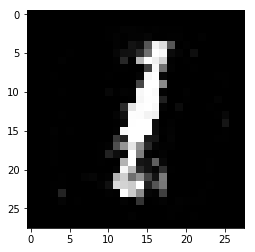

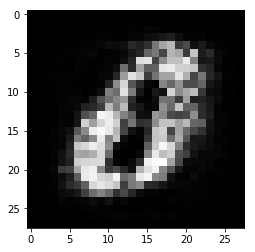

In [14]:
zsamples = np.random.normal(size=(10, 100))
pred = model_1.predict(zsamples)
for i in range(pred.shape[0]):
    plt.imshow(pred[i, :], cmap='gray')
    plt.show()